# Importing files

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# EDA

In [2]:
df=pd.read_csv('bank.csv',sep=';')
#Seperating the values based on Colon.

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.shape

(4521, 17)

There are 4521 rows and 17 columns in data

In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


 Total 9 independent features are Categorical and 7 are numeric features and y is target variable with values as yes or no.

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
corr=df.corr(numeric_only=True)
corr


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


<Axes: >

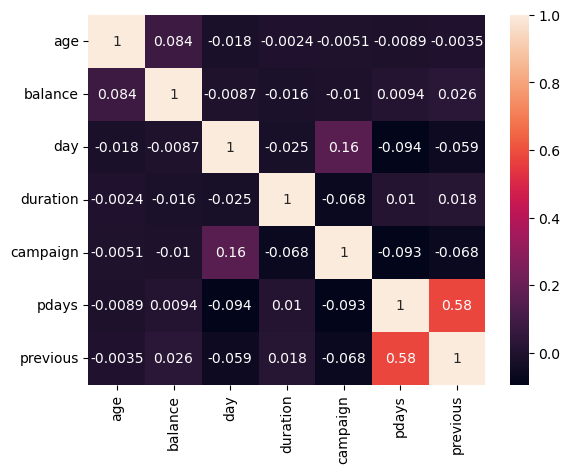

In [9]:
sns.heatmap(corr,annot=True)

 There is No High Correlation between Features.

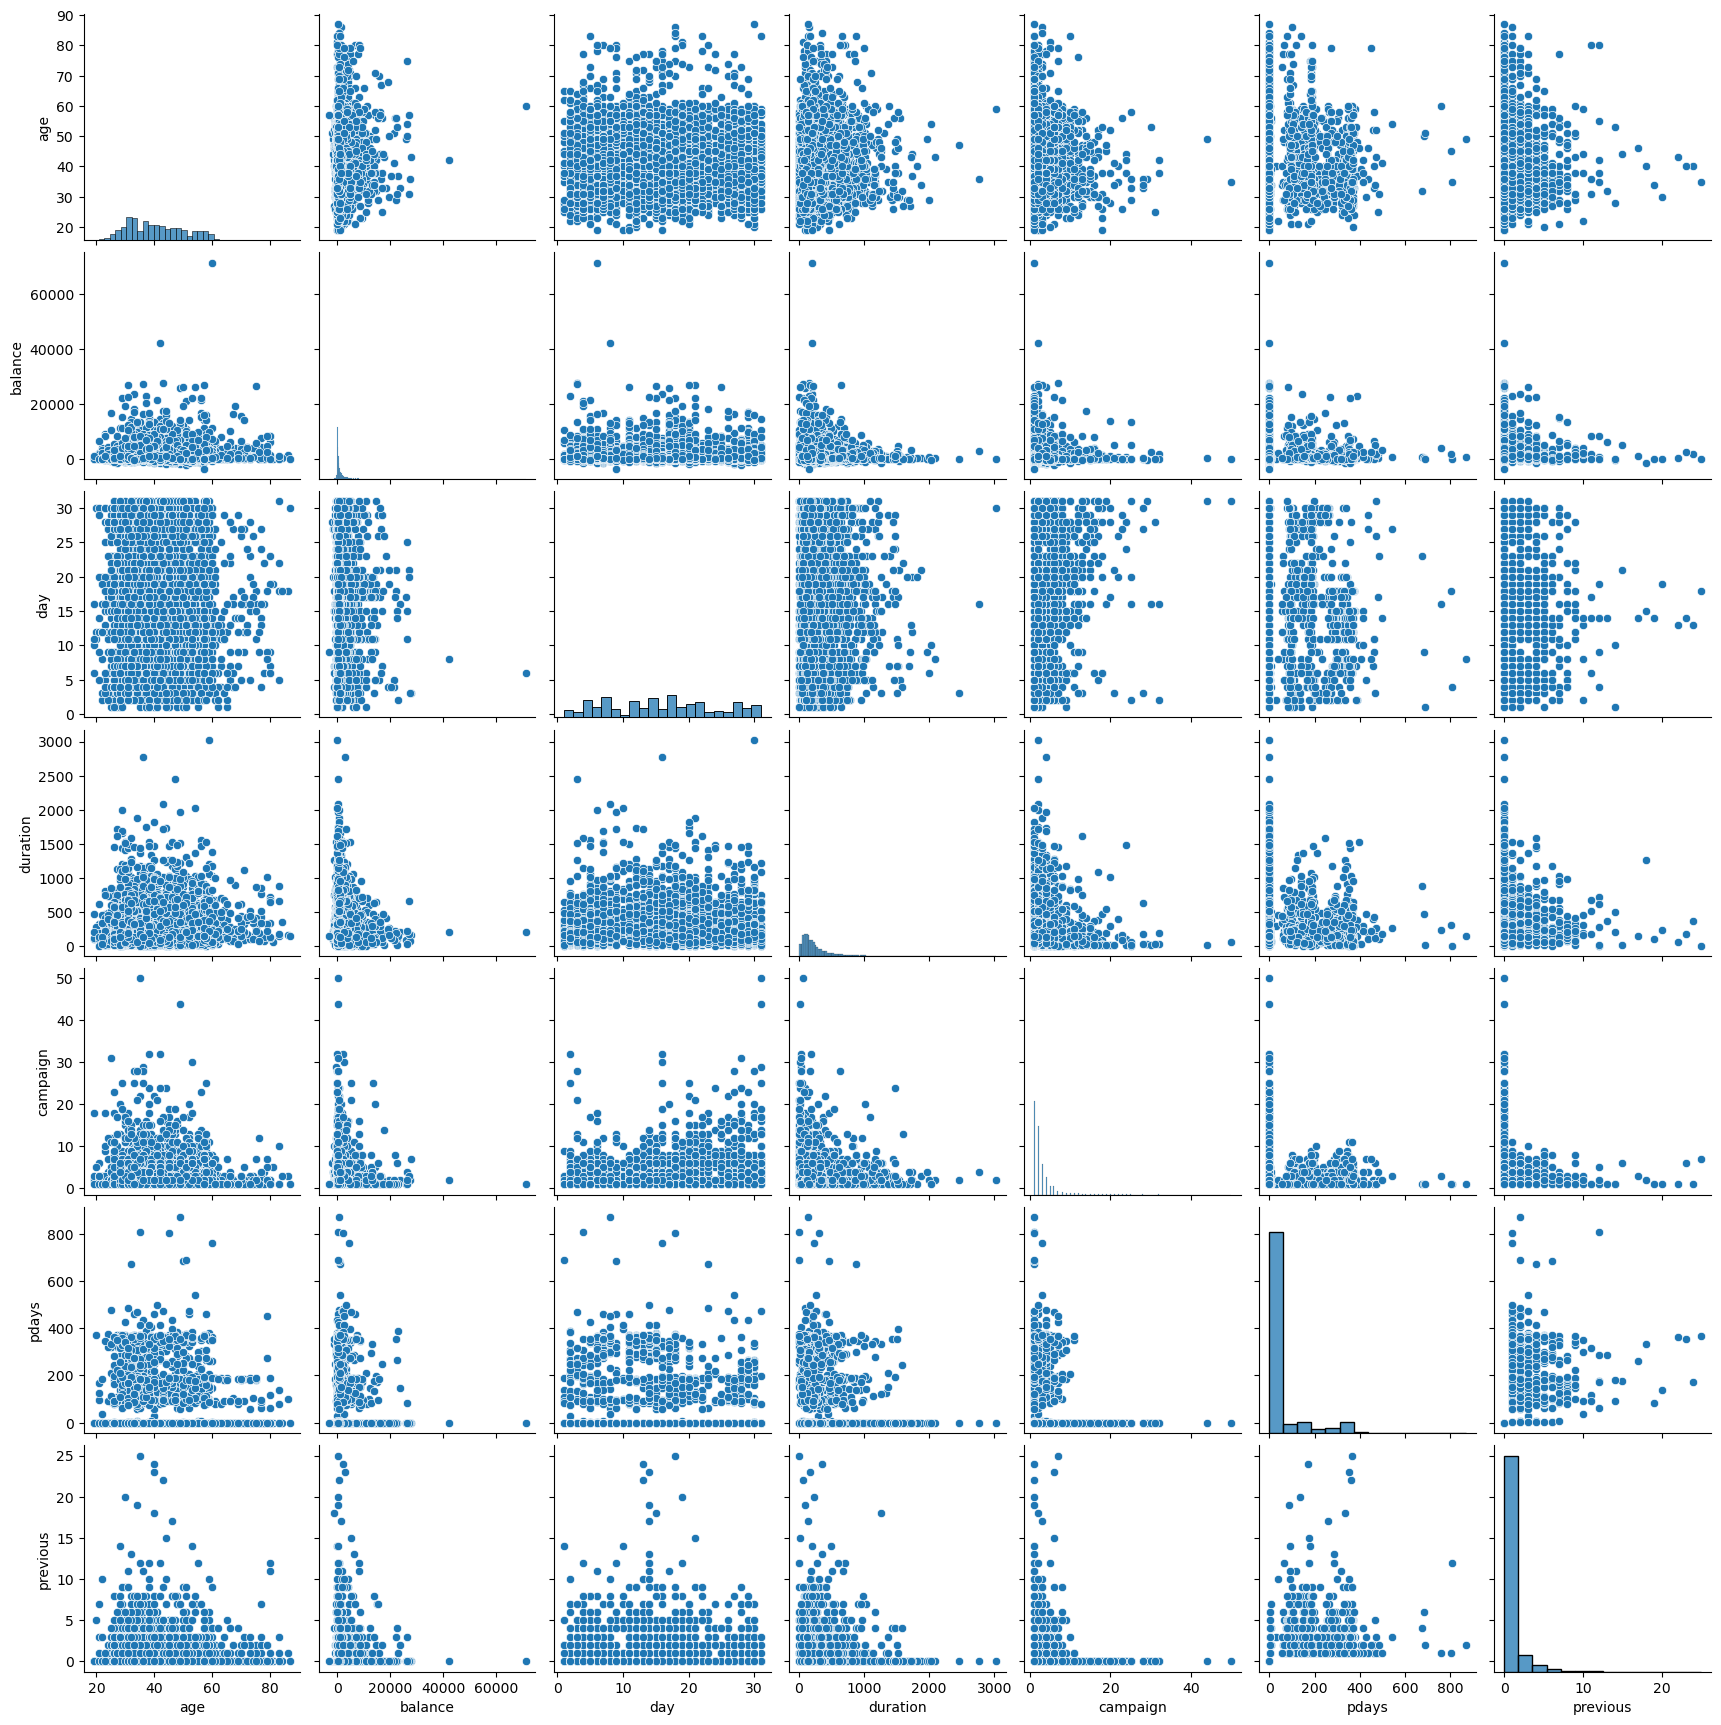

In [10]:
sns.pairplot(df)

<Axes: ylabel='age'>

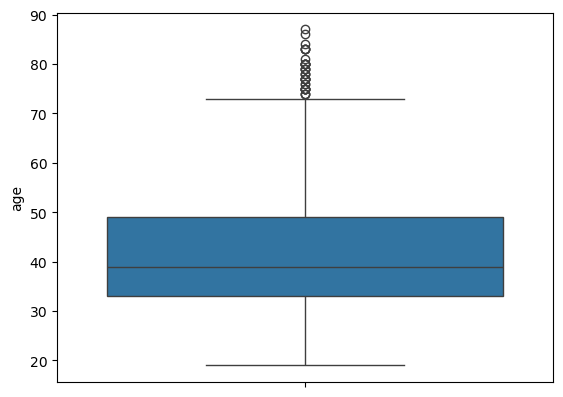

In [11]:
sns.boxplot(df['age'])

In [12]:
df[df['age']>75].count()

age          29
job          29
marital      29
education    29
default      29
balance      29
housing      29
loan         29
contact      29
day          29
month        29
duration     29
campaign     29
pdays        29
previous     29
poutcome     29
y            29
dtype: int64

 There are 29 Outliers in age which are abnormal values but not wrong values.

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: ylabel='balance'>

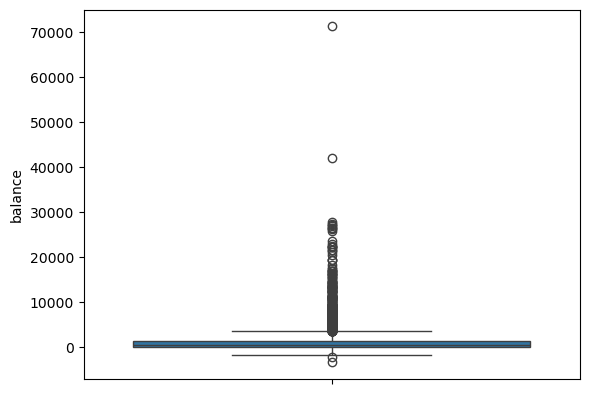

In [14]:
sns.boxplot(df['balance'])

There are many Outliers in balance, indicating wide range of balances of customers.

<Axes: ylabel='day'>

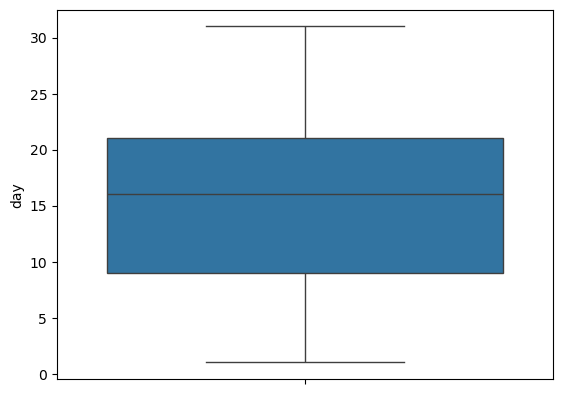

In [15]:
sns.boxplot(df['day'])

Day is in Normal Range

<Axes: ylabel='duration'>

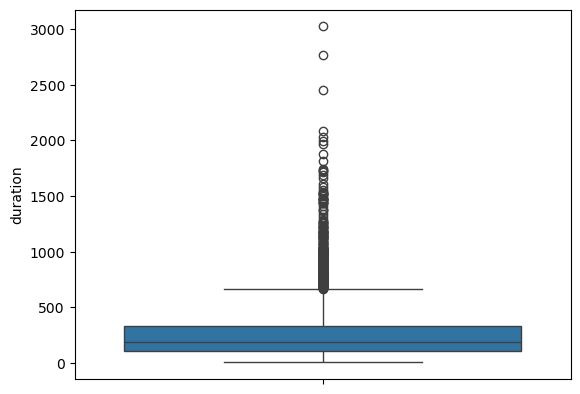

In [16]:
sns.boxplot(df['duration'])

Duration is in Seconds, it must be converted in minutes to make more sense

In [17]:
df['duration']=df['duration']/60

<Axes: ylabel='duration'>

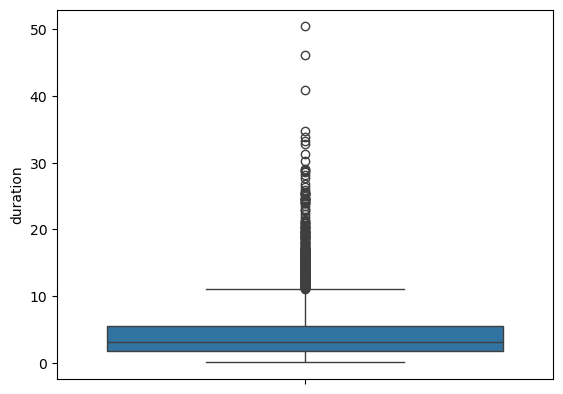

In [18]:
sns.boxplot(df['duration'])

there are many outliers in duration but none seems to be invalid value.

<Axes: ylabel='campaign'>

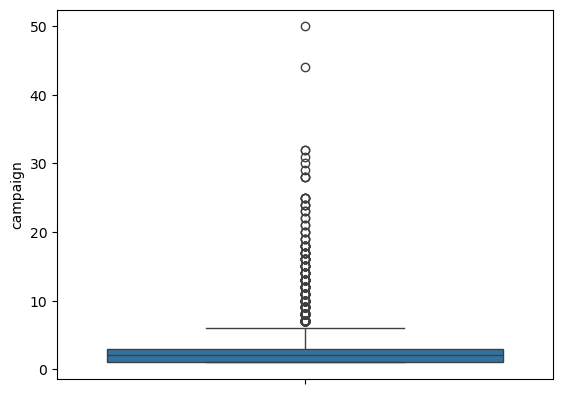

In [19]:
sns.boxplot(df['campaign'])

Campaign has many outliers indicating that many customers were called more than 7 times.

<Axes: ylabel='pdays'>

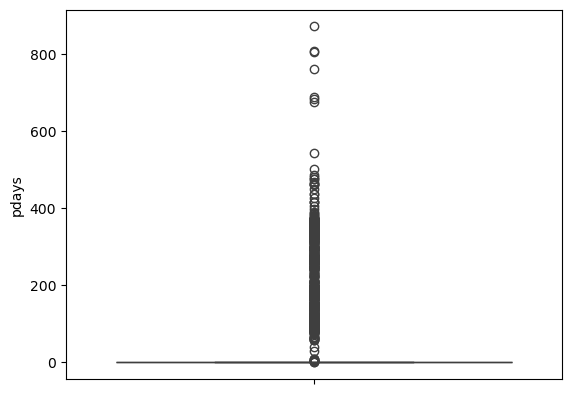

In [20]:
sns.boxplot(df['pdays'])

pdays has lot of Outliers and it seems to be not an important feature.

so we will drop it.

In [21]:
df.drop('pdays',axis=1,inplace=True)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1.316667,1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,3.666667,1,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,3.083333,1,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,3.316667,4,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,3.766667,1,0,unknown,no


<Axes: ylabel='previous'>

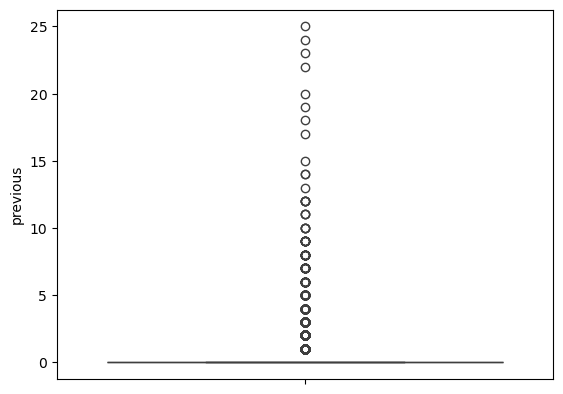

In [23]:
sns.boxplot(df['previous'])

In [24]:
df[df['previous']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1.316667,1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,3.316667,4,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,3.766667,1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,2.516667,2,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,0.950000,2,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,5.933333,2,0,unknown,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,10.400000,5,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5.483333,5,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,2.550000,1,0,unknown,no


There are 3705 customers to whom bank never contacted before.

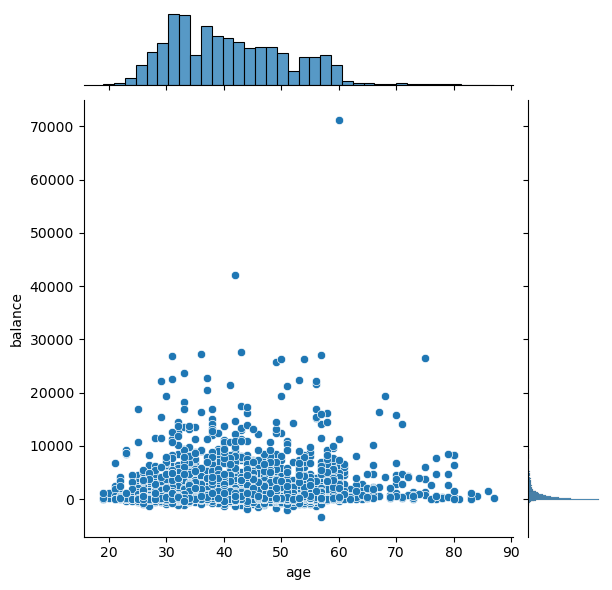

In [25]:
sns.jointplot(y=df['balance'],x=df['age'])

1. Majority People are in between 30 to 60 age group.
2. Balance of majority people are between 0 to 30000.

<Axes: xlabel='count', ylabel='job'>

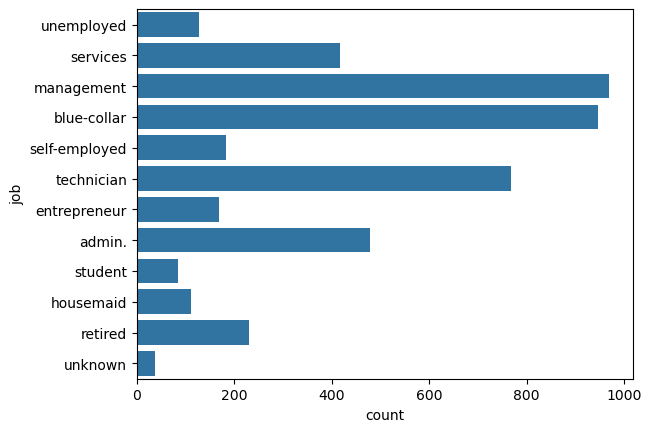

In [26]:
sns.countplot(df['job'])

In [27]:
df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

1. Majority Customers belongs to Management, Blue-collar and Technician.
2. There are 38 customers whose job is not known.
3. There are 230 Customers who are Retired.
4. 128 Custtomers are Unemployed.

In [28]:
df['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [29]:
2797/4521

0.6186684361866843

61.8% customers are married.

<Axes: xlabel='count', ylabel='education'>

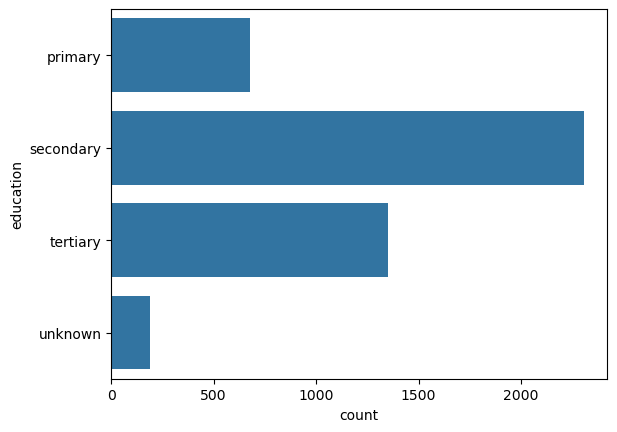

In [30]:
sns.countplot(df['education'])

Majority Customers are Secondary Passed.

<Axes: xlabel='count', ylabel='default'>

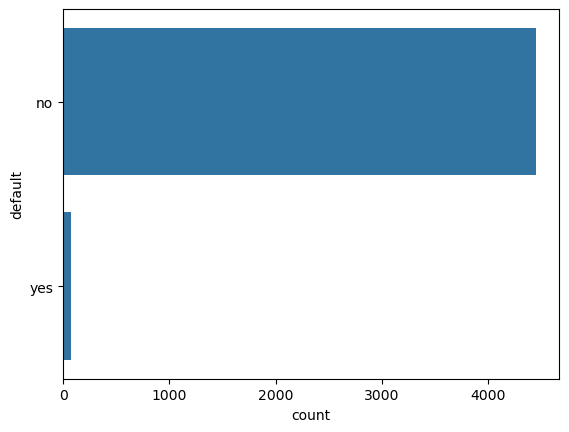

In [31]:
sns.countplot(df['default'])

In [32]:
df['default'].value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

All most all Customers are Non Default.

In [33]:
df['housing'].value_counts()

housing
yes    2559
no     1962
Name: count, dtype: int64

More than 50% Customers has taken the Home loan.

<Axes: xlabel='count', ylabel='loan'>

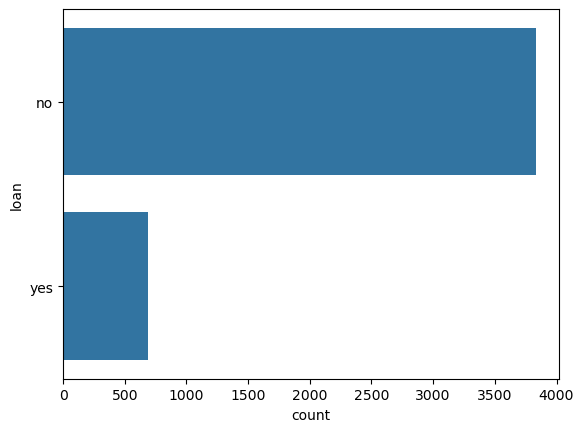

In [34]:
sns.countplot(df['loan'])

In [35]:
df['loan'].value_counts()

loan
no     3830
yes     691
Name: count, dtype: int64

Only 691 customers has Personal loan.

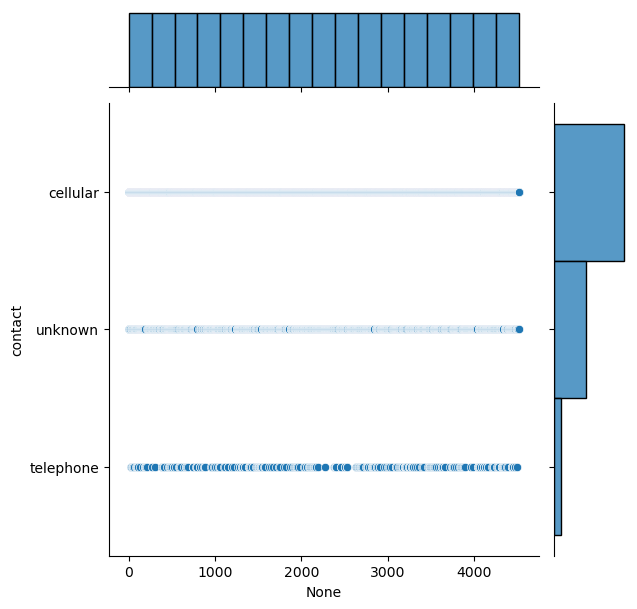

In [36]:
sns.jointplot(df['contact'])

In [37]:
df['contact'].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

2896 Customers are contacted through Cellular.

<Axes: xlabel='count', ylabel='poutcome'>

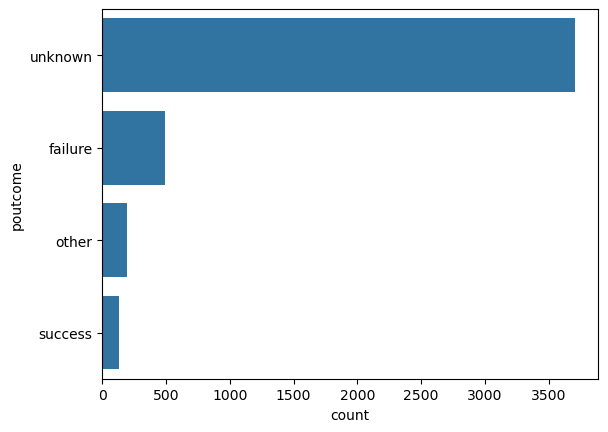

In [38]:
sns.countplot(df['poutcome'])

In [39]:
df['poutcome'].value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

Majority Call status is Unknown.

# Preprocessing

There are No Missing Values in the dataset.

In [40]:
le=LabelEncoder()

In [41]:
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,1.316667,1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,3.666667,1,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,3.083333,1,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,3.316667,4,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,3.766667,1,0,3,0


In [43]:
  X=df.drop('y',axis=1)
  y=df['y']

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

# Model Selection

1. Logistics regression
2. SVM
3. XGBoost

# Modelling and Evaluation Matrix

In [45]:
# logistic regression

logi=LogisticRegression()
logi.fit(X_train,y_train)
y_pred=logi.predict(X_test)


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1212
           1       0.64      0.24      0.35       145

    accuracy                           0.90      1357
   macro avg       0.78      0.61      0.65      1357
weighted avg       0.89      0.90      0.88      1357



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Reegression is 90%

In [46]:
#xgboost
xgb = XGBClassifier()

In [47]:
param={'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
       'max_depth':[3,4,5,6,8,10,12,15],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.3,0.4],
       'n_estimators':[40,50,100]
}

In [48]:
rsc=RandomizedSearchCV(estimator=xgb,
                 param_distributions=param,
                 scoring='accuracy',
                 n_iter=8
)

In [49]:
rsc.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=8,
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [40, 50, 100]},
                   scoring='accuracy')

In [50]:
rsc.best_params_

{'n_estimators': 100,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.2}

In [51]:
rsc.best_score_

0.8944422780810687

In [52]:
y_pred = rsc.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1212
           1       0.58      0.32      0.42       145

    accuracy                           0.90      1357
   macro avg       0.75      0.65      0.68      1357
weighted avg       0.89      0.90      0.89      1357



Accuracy of XGBOOST is 90%

In [54]:
#random forest
rfc = RandomForestClassifier(n_estimators=10)

In [55]:
param = {"n_estimators" : [10,20, 30, 40, 50], "bootstrap" : [True, False]}

In [56]:
gsc = GridSearchCV(estimator=rfc,
                  param_grid=param,
                  scoring="accuracy")

In [57]:
gsc.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [60]:
gsc.best_params_

{'bootstrap': True, 'n_estimators': 50}

In [58]:
y_pred = gsc.predict(X_test)

In [61]:
gsc.best_score_

0.8915931769552264

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1212
           1       0.64      0.27      0.38       145

    accuracy                           0.91      1357
   macro avg       0.78      0.63      0.66      1357
weighted avg       0.89      0.91      0.89      1357



Accuracy of Random Forest is 91%

The Best Accuracy we got is because of 91% where Random Forest tied.